In [2]:
import joblib
import functions # contains few custom functions used for displaying the prediction results
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,\
    precision_score, recall_score, roc_auc_score, roc_curve, auc

In [3]:
scalerFile = 'Calibrated Models/scaler.sav'
qualityModelFile = 'Calibrated Models/qualityModel.sav'
qualityTypeModeFile = 'Calibrated Models/qualityTypeModel.sav'

scaler = joblib.load(scalerFile)
qualityModel = joblib.load(qualityModelFile)
qualityTypeModel = joblib.load(qualityTypeModeFile)

In [4]:
qualityModelTestData = pd.read_csv('Test Data/testData_qualityModel.csv', sep = ",", index_col=0)
qualityTypeModelTestData = pd.read_csv('Test Data/testData_qualityTypeModel.csv', sep = ",", index_col=0)

#in case of original data (not scaled), scaling (all variables except quality/quality type) 
#and removing of density and free_sulfur_dioxide variable may be required
#qualityModelTestData_scaled = \
#    scaler.transform(qualityModelTestData[qualityModelTestData.columns.drop(['quality', 'density', 'free_sulfur_dioxide'])])
#qualityModelTestData_scaled = \
#    pd.DataFrame(qualityModelTestData_scaled, columns=qualityModelTestData.columns.drop(['quality', 'density', 'free_sulfur_dioxide']))
#qualityModelTestData_scaled['quality'] = qualityModelTestData['quality']

In [5]:
functions.printStatistics(qualityModel, qualityModelTestData[qualityModelTestData.columns.drop('quality')],\
                          qualityModelTestData.loc[:,'quality'], \
                          precision_score, recall_score, f1_score, confusion_matrix)

Accuracy  : 0.67551
Precision  : 0.67551
Recall  : 0.67551
f1_score  : 0.67551
Confusion matrix
[[  0   0   1   1   0   0]
 [  0   4  14  10   1   0]
 [  0   0 191 100   2   0]
 [  0   1  52 351  31   0]
 [  0   0   6  74 102   2]
 [  0   0   0  11  12  14]]
Best model parameters
{'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


Accuracy  : 0.85000
Precision  : 0.85000
Recall  : 0.85000
f1_score  : 0.85000
Confusion matrix
[[  3  27   1]
 [  1 693  34]
 [  0  84 137]]
Best model parameters
{'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


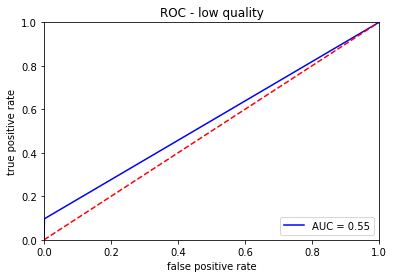

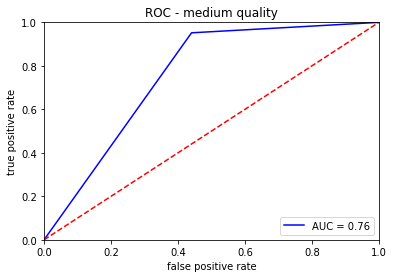

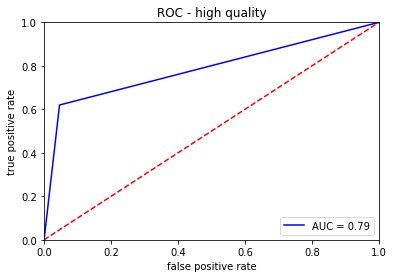

In [6]:
functions.printStatistics(qualityTypeModel, qualityTypeModelTestData[qualityTypeModelTestData.columns.drop('qualityType')],\
                          qualityTypeModelTestData.loc[:,'qualityType'], \
                          precision_score, recall_score, f1_score, confusion_matrix)

functions.plotRocCurves(qualityTypeModel, qualityTypeModelTestData[qualityTypeModelTestData.columns.drop('qualityType')],\
                        qualityTypeModelTestData.loc[:,'qualityType'], \
                        auc, roc_curve, plt)